In [253]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.filterwarnings(action='ignore')

# scikit-learn
import sklearn

# ÏàòÏπòÌòï Î≥ÄÌôò
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# PCA (Ï∞®Ïõê Ï∂ïÏÜå : Ï£ºÏÑ±Î∂ÑÎ∂ÑÏÑù)
from sklearn.decomposition import PCA

# Î¨∏Ï†úÏßÄ, ÎãµÏïàÏßÄ Î∂ÑÎ¶¨
from sklearn.model_selection import train_test_split

# ÌöåÍ∑Ä Î™®Îç∏ (+ ÌÜµÍ≥Ñ)
# from sklearn.linear_model import LogisticRegression --> Î∂ÑÎ•ò Î™®Îç∏ / ÌöåÍ∑Ä XXXXXXXX
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# Ïô∏Î∂Ä(Google) ÌöåÍ∑ÄÎ™®Îç∏ (+ Î≥ÑÎèÑÏÑ§Ïπò )
# import xgboost as xgb
# import lightgbm as lgb
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Ï†ïÍ∑úÌôî / Ïä§ÏºÄÏùºÎü¨
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# ÍµêÏ∞® Í≤ÄÏ¶ù : StratifiedKFold (yÎ•º Í≥†Î•¥Í≤å Ìè¥ÎìúÏóê Î∂ÑÎ∞∞ÌïúÎã§Îäî Í≤ÉÏùÄ ÌöåÍ∑ÄÏóêÏÑú ÏóÜÎã§) 
from sklearn.model_selection import KFold, cross_validate, GridSearchCV

# ÌöåÍ∑Ä ÌèâÍ∞Ä Îß§Ìä∏Î¶≠Ïä§
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score
from sklearn.linear_model import RidgeCV

# ÏïôÏÉÅÎ∏î
from sklearn.ensemble import StackingRegressor

# ÌååÏù¥ÌîÑÎùºÏù∏
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor

# matplotlib Ï∞®Ìä∏ Ïä§ÌÉÄÏùºÏùÑ seaborn Ïä§ÌÉÄÏùºÎ°ú ÏÑ§Ï†ï
sns.set()

# ----------- Ï∞®Ìä∏ Í¥ÄÎ†® ÏÜçÏÑ± (ÌïúÍ∏ÄÏ≤òÎ¶¨, Í∑∏Î¶¨Îìú) -----------
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

#-------------------- Ï£ºÌîºÌÑ∞ , Ï∂úÎ†•Í≤∞Í≥º ÎÑìÏù¥ ÎäòÎ¶¨Í∏∞ ---------------
# from IPython.core.display import display, HTML
from IPython.display import display, HTML

display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

# EDA

In [254]:
df = pd.read_csv('../data/train.csv')
df.head()

id  RhythmScore  AudioLoudness  VocalContent  AcousticQuality  \
0   0     0.603610      -7.636942      0.023500         0.000005   
1   1     0.639451     -16.267598      0.071520         0.444929   
2   2     0.514538     -15.953575      0.110715         0.173699   
3   3     0.734463      -1.357000      0.052965         0.001651   
4   4     0.532968     -13.056437      0.023500         0.068687   

   InstrumentalScore  LivePerformanceLikelihood  MoodScore  TrackDurationMs  \
0           0.000001                   0.051385   0.409866      290715.6450   
1           0.349414                   0.170522   0.651010      164519.5174   
2           0.453814                   0.029576   0.423865      174495.5667   
3           0.159717                   0.086366   0.278745      225567.4651   
4           0.000001                   0.331345   0.477769      213960.6789   

     Energy  BeatsPerMinute  
0  0.826267       147.53020  
1  0.145400       136.15963  
2  0.624667        55.31989  
3  0.487467       147.91212  
4  0.947333        89.58511

| ÏïΩÏñ¥ (Abbr.) | Ï†ÑÏ≤¥ Ïù¥Î¶Ñ (Full Name)           | Ìïú Ï§Ñ ÏöîÏïΩ ÏÑ§Î™Ö |
|:-------------:|:--------------------------------:|:----------------|
| **rs**  | RhythmScore | Î¶¨Îì¨Ïùò Î≥µÏû°ÏÑ±Ïù¥ÎÇò Í∑úÏπôÏÑ±ÏùÑ ÎÇòÌÉÄÎÇ¥Îäî Ï†êÏàò |
| **al**  | AudioLoudness | ÎÖ∏ÎûòÏùò Ï†ÑÏ≤¥Ï†ÅÏù∏ ÌèâÍ∑† ÏùåÎüâ (Îç∞ÏãúÎ≤®) |
| **vc**  | VocalContent | ÎÖ∏ÎûòÏóêÏÑú Î≥¥Ïª¨(Î™©ÏÜåÎ¶¨)Ïù¥ Ï∞®ÏßÄÌïòÎäî ÎπÑÏ§ë |
| **aq**  | AcousticQuality | ÏùåÏïÖÏù¥ ÏñºÎßàÎÇò 'Ïñ¥Ïø†Ïä§Ìã±'ÌïúÏßÄ(Ï†ÑÏûêÏùåÏù¥ Ï†ÅÏùÄÏßÄ) ÎÇòÌÉÄÎÇ¥Îäî Ï≤ôÎèÑ |
| **is**  | InstrumentalScore | ÎÖ∏ÎûòÏóêÏÑú ÏïÖÍ∏∞ Ïó∞Ï£ºÍ∞Ä Ï∞®ÏßÄÌïòÎäî ÎπÑÏ§ë |
| **lpl** | LivePerformanceLikelihood | Ïù¥ Í≥°Ïù¥ ÎùºÏù¥Î∏å Í≥µÏó∞Ïùº Í∞ÄÎä•ÏÑ± |
| **ms**  | MoodScore | Í≥°Ïùò Ï†ÑÎ∞òÏ†ÅÏù∏ Î∂ÑÏúÑÍ∏∞(Ïòà: Í∏çÏ†ï, Î∂ÄÏ†ï)Î•º ÎÇòÌÉÄÎÇ¥Îäî Ï†êÏàò |
| **tdm** | TrackDurationMs | ÎÖ∏ÎûòÏùò Ï¥ù Í∏∏Ïù¥ (Î∞ÄÎ¶¨Ï¥à Îã®ÏúÑ) |
| **e**   | Energy | ÎÖ∏ÎûòÏùò ÏóêÎÑàÏßÄ Î†àÎ≤®, Ï¶â Í∞ïÎ†¨ÌïòÍ≥† ÌôúÍ∏∞Ï∞¨ Ï†ïÎèÑ |
| **bpm** | BeatsPerMinute | (ÌÉÄÍ≤ü Î≥ÄÏàò) 1Î∂ÑÎãπ ÎπÑÌä∏ Ïàò, Ï¶â ÎÖ∏ÎûòÏùò Îπ†Î•¥Í∏∞ |
| --- | --- | --- |
| **tdm** | TrackDurationMin | tdm(Î∞ÄÎ¶¨Ï¥à)ÏùÑ Î∂Ñ(minute) Îã®ÏúÑÎ°ú Î≥ÄÌôòÌïú ÎÖ∏ÎûòÏùò Í∏∏Ïù¥ |
| **ear** | Energy_Acoustic_Ratio | ÏóêÎÑàÏßÄ ÎåÄÎπÑ Ïñ¥Ïø†Ïä§Ìã±Ìï®Ïùò ÎπÑÏú®Î°ú, Ï†ÑÏûêÏùåÏïÖ/Ïñ¥Ïø†Ïä§Ìã± ÏÑ±Ìñ•ÏùÑ ÎÇòÌÉÄÎÉÑ |
| **vib** | Vocal_Instrument_Balance | Î≥¥Ïª¨Í≥º ÏïÖÍ∏∞ ÏÇ¨Ïö¥ÎìúÏùò Í∑†ÌòïÏùÑ ÎÇòÌÉÄÎÇ¥Îäî ÏßÄÌëú |
| **mr**  | MoodRhythm | Î∂ÑÏúÑÍ∏∞(Mood)ÏôÄ Î¶¨Îì¨Í∞ê(Rhythm)Ïùò ÏãúÎÑàÏßÄ Ìö®Í≥ºÎ•º ÎÇòÌÉÄÎÇ¥Îäî Ï†êÏàò |
| **pi**  | PerformanceIntensity | ÎùºÏù¥Î∏å Í≥µÏó∞Ïùò Í∞ïÎ†¨Ìï® ÎòêÎäî ÌòÑÏû•Í∞êÏùÑ ÎÇòÌÉÄÎÇ¥Îäî ÏßÄÌëú |
| **re**  | RhythmEnergy | Î¶¨Îì¨Ïùò ÌôúÍ∏∞ ÎòêÎäî ÎåÑÏä§ Í∞ÄÎä•ÏÑ±ÏùÑ ÎÇòÌÉÄÎÇ¥Îäî ÏóêÎÑàÏßÄ Ï†êÏàò |
| **ma**  | MoodAcoustic | ÏùåÏïÖÏùò Î∂ÑÏúÑÍ∏∞ÏôÄ Ïñ¥Ïø†Ïä§Ìã± ÌäπÏÑ±Ïùò Ï°∞Ìï©ÏùÑ ÎÇòÌÉÄÎÇ¥Îäî Í∞í |

In [255]:
df = df.drop('id', axis=1)
df.columns = ['rs', 'al', 'vc', 'aq', 'is', 'lpl', 'ms', 'tdm', 'e', 'bpm']
df.head()

rs         al        vc        aq        is       lpl        ms  \
0  0.603610  -7.636942  0.023500  0.000005  0.000001  0.051385  0.409866   
1  0.639451 -16.267598  0.071520  0.444929  0.349414  0.170522  0.651010   
2  0.514538 -15.953575  0.110715  0.173699  0.453814  0.029576  0.423865   
3  0.734463  -1.357000  0.052965  0.001651  0.159717  0.086366  0.278745   
4  0.532968 -13.056437  0.023500  0.068687  0.000001  0.331345  0.477769   

           tdm         e        bpm  
0  290715.6450  0.826267  147.53020  
1  164519.5174  0.145400  136.15963  
2  174495.5667  0.624667   55.31989  
3  225567.4651  0.487467  147.91212  
4  213960.6789  0.947333   89.58511

In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524164 entries, 0 to 524163
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   rs      524164 non-null  float64
 1   al      524164 non-null  float64
 2   vc      524164 non-null  float64
 3   aq      524164 non-null  float64
 4   is      524164 non-null  float64
 5   lpl     524164 non-null  float64
 6   ms      524164 non-null  float64
 7   tdm     524164 non-null  float64
 8   e       524164 non-null  float64
 9   bpm     524164 non-null  float64
dtypes: float64(10)
memory usage: 40.0 MB


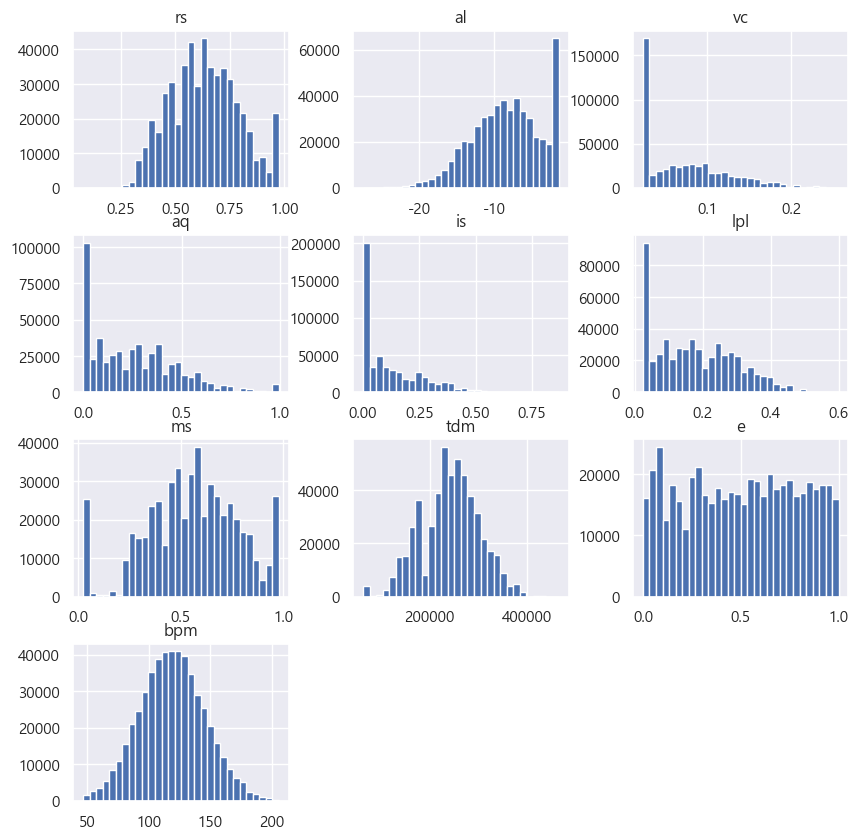

In [257]:
df.hist(figsize=(10, 10), bins=30)
plt.show()

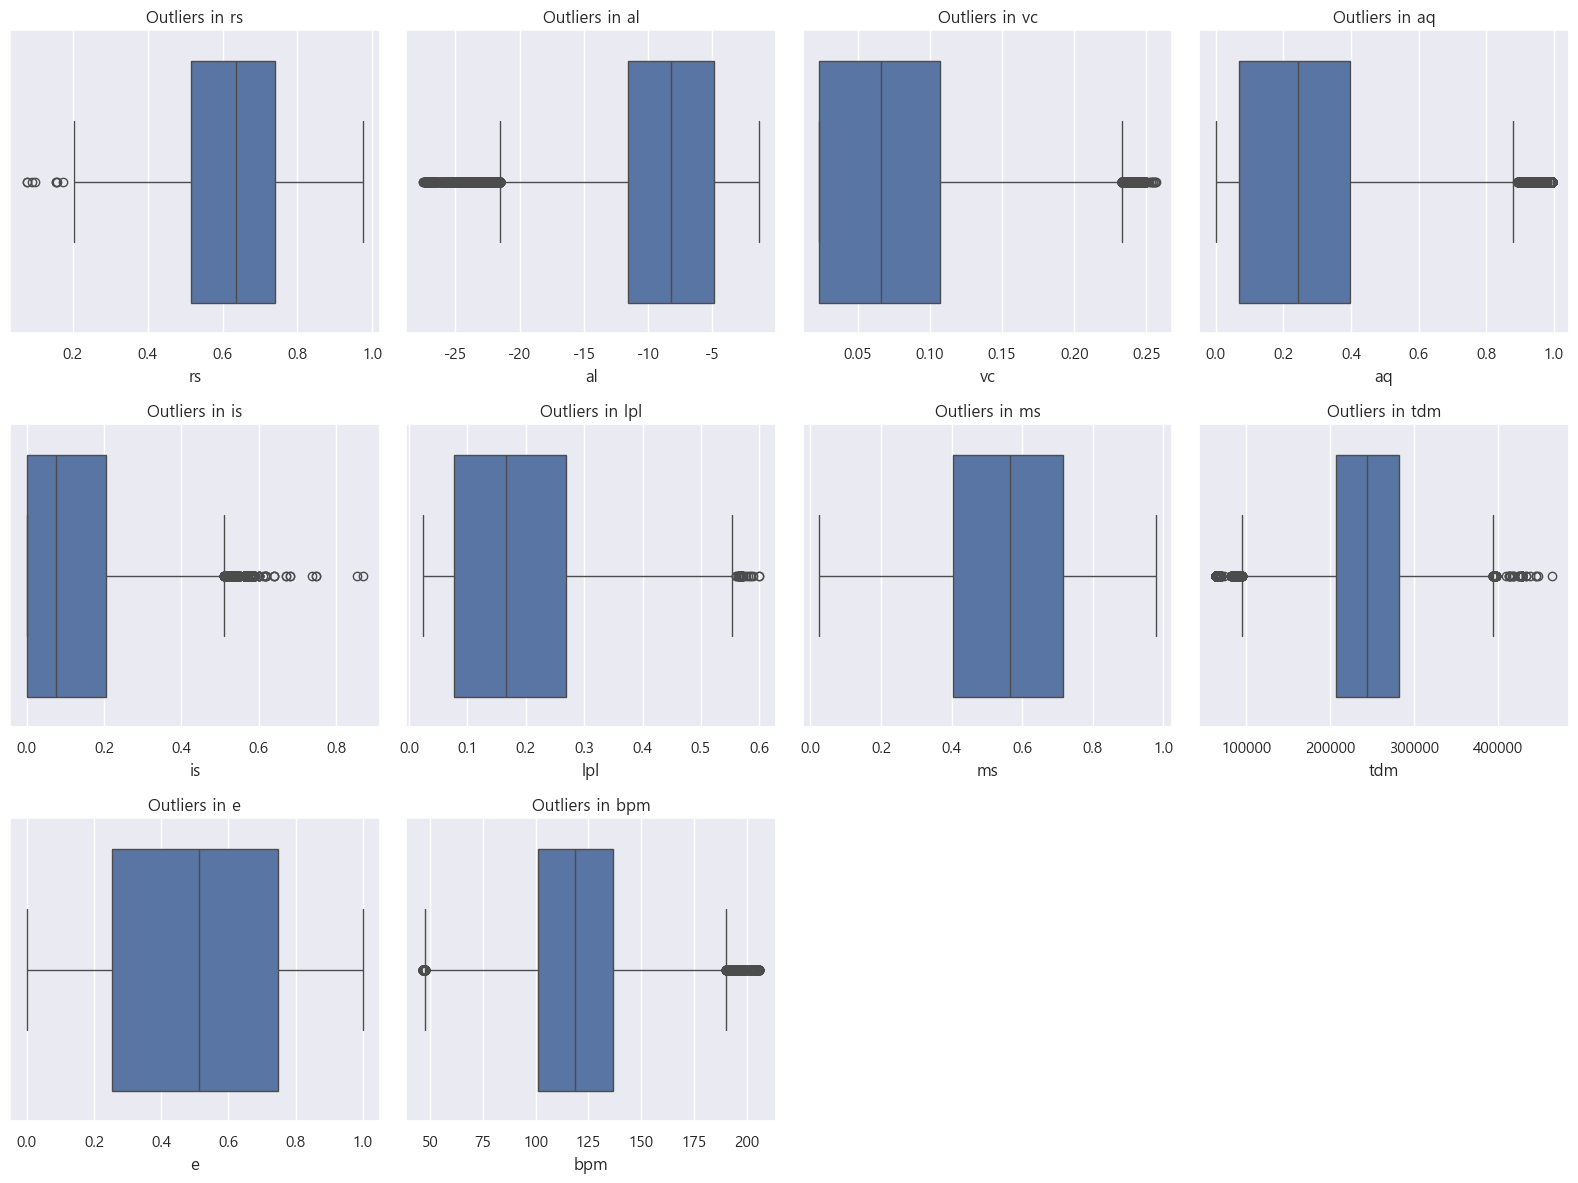

In [258]:
# Î∂ÑÏÑùÌï† Ïà´ÏûêÌòï ÌäπÏÑ±Îì§ ÏÑ†ÌÉù
# num_features = df.columns
num_features = df.select_dtypes(include=np.number).columns.tolist()

# 1. Ï†ÑÏ≤¥ Í∑∏Î¶ºÏùò ÌÅ¨Í∏∞ÏôÄ Í≤©Ïûê(grid) ÏÑ§Ï†ï
n_features = len(num_features)
n_cols = 4  # Ìïú Ï§ÑÏóê Í∑∏Î¶¥ Í∑∏ÎûòÌîÑÏùò Í∞úÏàò (ÏõêÌïòÎäî ÎåÄÎ°ú Ï°∞Ï†à)
n_rows = math.ceil(n_features / n_cols) # ÌïÑÏöîÌïú Ï§ÑÏùò Í∞úÏàò ÏûêÎèô Í≥ÑÏÇ∞

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 4))
axes = axes.flatten() # 2Ï∞®Ïõê Î∞∞Ïó¥ÏùÑ 1Ï∞®ÏõêÏúºÎ°ú Î≥ÄÌôòÌïòÏó¨ Îã§Î£®Í∏∞ ÏâΩÍ≤å Ìï®

# 2. forÎ¨∏ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Í∞Å subplotÏóê boxplot Í∑∏Î¶¨Í∏∞
for i, col in enumerate(num_features):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f"Outliers in {col}")

# 3. ÎÇ®Îäî Îπà subplotÎì§ÏùÄ Î≥¥Ïù¥ÏßÄ ÏïäÍ≤å Ï≤òÎ¶¨
for j in range(n_features, len(axes)):
    axes[j].axis('off')

# 4. Ï†ÑÏ≤¥ Í∑∏Î¶ºÏùÑ Î≥¥Í∏∞ Ï¢ãÍ≤å Ï°∞Ï†ïÌïòÍ≥† Ï∂úÎ†•
plt.tight_layout()
plt.show()

# myscore Í≥µÌÜµÌï®Ïàò

In [259]:
# ----------------------------------------------------
# Ïù¥Ï†Ñ Ï†êÏàòÎ•º Ï†ÄÏû•Ìï† Î≥ÄÏàò
previous_scores = None
# ----------------------------------------------------

def myscore(X80=None, y80=None, X20=None, y20=None, model=None, df=None, fi=None, top_n=None):
    """
    Î™®Îç∏ÏùÑ ÌïôÏäµ/ÌèâÍ∞ÄÌïòÍ≥†, fi=TrueÏùº Í≤ΩÏö∞ ÌîºÏ≥ê Ï§ëÏöîÎèÑÎ•º ÏãúÍ∞ÅÌôîÌï©ÎãàÎã§.
    - fi: TrueÎ°ú ÏÑ§Ï†ïÌïòÎ©¥ ÌîºÏ≥ê Ï§ëÏöîÎèÑÎ•º Ï∂úÎ†•Ìï©ÎãàÎã§.
    - top_n: NoneÏù¥Î©¥ Î™®Îì† ÌîºÏ≥ê, Ïà´ÏûêÎ•º ÏûÖÎ†•ÌïòÎ©¥ ÏÉÅÏúÑ nÍ∞úÏùò Ï§ëÏöîÎèÑÎ•º Î≥¥Ïó¨Ï§çÎãàÎã§.
    """
    global previous_scores
    
    # Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï† Î°úÏßÅ (Í∏∞Ï°¥Í≥º ÎèôÏùº)
    if df is not None:
        y = df['bpm']
        X = df.drop('bpm', axis=1)
        X80, X20, y80, y20 = train_test_split(X, y, test_size=0.2, random_state=8989)
    
    if model is None:
        model = XGBRegressor(random_state=8989)
    
    # Î™®Îç∏ ÌïôÏäµ Î∞è ÏòàÏ∏° (Í∏∞Ï°¥Í≥º ÎèôÏùº)
    model.fit(X80, y80)
    pred = model.predict(X20)
    
    # Ï†êÏàò Í≥ÑÏÇ∞ Î∞è ÎπÑÍµê Ï∂úÎ†• (Í∏∞Ï°¥Í≥º ÎèôÏùº)
    mse = mean_squared_error(y20, pred)
    rmse = root_mean_squared_error(y20, pred)
    r2 = r2_score(y20, pred)
    current_scores = {'MSE': mse, 'RMSE': rmse, 'R2': r2}
    
    print(f'MODEL : {model.__class__.__name__}\nMSE : {mse:.4f}\nRMSE : {rmse:.4f}\nR2 : {r2:.4f}')
    print("-" * 30)

    if previous_scores:
        print("--- Score Comparison (Current vs Previous) ---")
        for key, current_val in current_scores.items():
            prev_val = previous_scores.get(key, 0)
            diff = current_val - prev_val
            if key == 'R2':
                is_good = "üìà" if diff > 0 else "üìâ"
            else:
                is_good = "üìà" if diff < 0 else "üìâ"
            print(f'{key:<5}: {current_val:.4f} vs {prev_val:.4f} (Change: {diff:+.4f}) {is_good}')
    else:
        print("Ï≤´ Î≤àÏß∏ Ïã§ÌñâÏù¥ÎØÄÎ°ú ÎπÑÍµêÌï† Ïù¥Ï†Ñ Ï†êÏàòÍ∞Ä ÏóÜÏäµÎãàÎã§.")

    print("-" * 30 + "\n")
    previous_scores = current_scores

    # Feature Importance ÏãúÍ∞ÅÌôî
    if fi:
        if isinstance(model, Pipeline):
            actual_model = model.steps[-1][1]
        else:
            actual_model = model

        if not hasattr(actual_model, 'feature_importances_'):
            print(f"\nNOTE: Ïù¥ Î™®Îç∏({actual_model.__class__.__name__})ÏùÄ feature_importances_ ÏÜçÏÑ±Ïù¥ ÏóÜÏäµÎãàÎã§.")
            return

        importances = actual_model.feature_importances_
        feature_names = X80.columns
        fi_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
        fi_df = fi_df.sort_values(by='importance', ascending=False)

        title_text = f'Feature Importances ({actual_model.__class__.__name__})'
        # top_n Í∞íÏù¥ Ï£ºÏñ¥ÏßÄÎ©¥ Ìï¥Îãπ Í∞úÏàòÎßåÌÅºÎßå ÏÑ†ÌÉù
        if top_n is not None:
            fi_df = fi_df.head(top_n)
            title_text = f'Top {top_n} ' + title_text

        # SeabornÏúºÎ°ú ÏÑ∏Î°ú ÎßâÎåÄ Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî
        plt.figure(figsize=(12, 6))
        sns.barplot(x='feature', y='importance', data=fi_df)
        plt.title(title_text)
        plt.xticks(rotation=45, ha='right') # XÏ∂ï ÎùºÎ≤® 45ÎèÑ ÌöåÏ†Ñ
        plt.tight_layout()
        plt.show()

## Ï≤´ Î≤àÏß∏ Ï†êÏàò ÌôïÏù∏

MODEL : XGBRegressor
MSE : 703.1462
RMSE : 26.5169
R2 : -0.0068
------------------------------
Ï≤´ Î≤àÏß∏ Ïã§ÌñâÏù¥ÎØÄÎ°ú ÎπÑÍµêÌï† Ïù¥Ï†Ñ Ï†êÏàòÍ∞Ä ÏóÜÏäµÎãàÎã§.
------------------------------



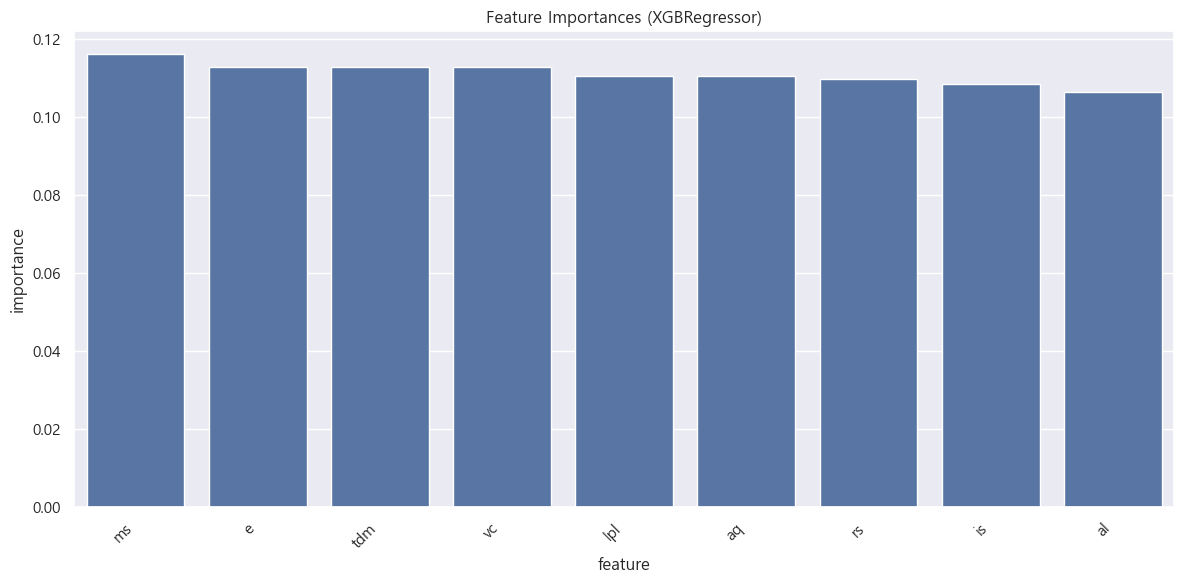

In [260]:
myscore(df = df, fi=True)

# Ï†ÑÏ≤òÎ¶¨ & Í∞ÄÍ≥µ

## Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨

In [261]:
import pandas as pd
import numpy as np

###########################################################
# 1. IQR Í∏∞Î∞ò Ïù¥ÏÉÅÏπò Ìñâ 'ÏÇ≠Ï†ú' (Trimming) - dft ÏÇ¨Ïö©
###########################################################

# ÏõêÎ≥∏ DataFrameÏùÑ 'dft'Î°ú ÏïàÏ†ÑÌïòÍ≤å Î≥µÏÇ¨
dft = df.copy()

# dftÏóêÏÑú Ïà´ÏûêÌòï ÌäπÏÑ±(feature)Îì§Ïùò Î¶¨Ïä§Ìä∏Î•º Í∞ÄÏ†∏Ïò¥
num_features_for_trim = dft.select_dtypes(include=np.number).columns.tolist()

print(">> Trimming Process Start")
print("Original Shape (dft):", dft.shape)

# dftÏùò Í∞Å Ïà´ÏûêÌòï ÌäπÏÑ±Ïóê ÎåÄÌï¥ Ïù¥ÏÉÅÏπò Ìñâ ÏÇ≠Ï†ú
for col in num_features_for_trim:
    Q1 = dft[col].quantile(0.25)
    Q3 = dft[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Ï†ïÏÉÅ Î≤îÏúÑÏóê ÏûàÎäî ÌñâÎßå dftÏóê ÎÇ®ÍπÄ
    dft = dft[(dft[col] >= lower_bound) & (dft[col] <= upper_bound)]

# ÏµúÏ¢Ö Í≤∞Í≥º ÌôïÏù∏
print("Trimmed Shape (dft):", dft.shape)
print("-" * 50)


###########################################################
# 2. IQR Í∏∞Î∞ò Ïù¥ÏÉÅÏπò 'ÎåÄÏ≤¥' (Winsorization) - dfw ÏÇ¨Ïö©
###########################################################

# ÏõêÎ≥∏ DataFrameÏùÑ 'dfw'Î°ú ÏïàÏ†ÑÌïòÍ≤å Î≥µÏÇ¨
dfw = df.copy()

# dfwÏóêÏÑú Ïà´ÏûêÌòï ÌäπÏÑ±(feature)Îì§Ïùò Î¶¨Ïä§Ìä∏Î•º Í∞ÄÏ†∏Ïò¥
num_features_for_winsorize = dfw.select_dtypes(include=np.number).columns.tolist()

print(">> Winsorization Process Start")
print("Original Shape (dfw):", dfw.shape)

# dfwÏùò Í∞Å Ïà´ÏûêÌòï ÌäπÏÑ±Ïóê ÎåÄÌï¥ Ïù¥ÏÉÅÏπòÎ•º Í≤ΩÍ≥ÑÍ∞íÏúºÎ°ú ÎåÄÏ≤¥
for col in num_features_for_winsorize:
    Q1 = dfw[col].quantile(0.25)
    Q3 = dfw[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # dfwÏùò Í∞íÏùÑ np.whereÎ•º ÏÇ¨Ïö©ÌïòÏó¨ ÎåÄÏ≤¥
    dfw[col] = np.where(dfw[col] < lower_bound, lower_bound,
                        np.where(dfw[col] > upper_bound, upper_bound, dfw[col]))

# ÏµúÏ¢Ö Í≤∞Í≥º ÌôïÏù∏
print("Winsorized Shape (dfw):", dfw.shape)
print("-" * 50)

>> Trimming Process Start
Original Shape (dft): (524164, 10)
Trimmed Shape (dft): (505206, 10)
--------------------------------------------------
>> Winsorization Process Start
Original Shape (dfw): (524164, 10)
Winsorized Shape (dfw): (524164, 10)
--------------------------------------------------


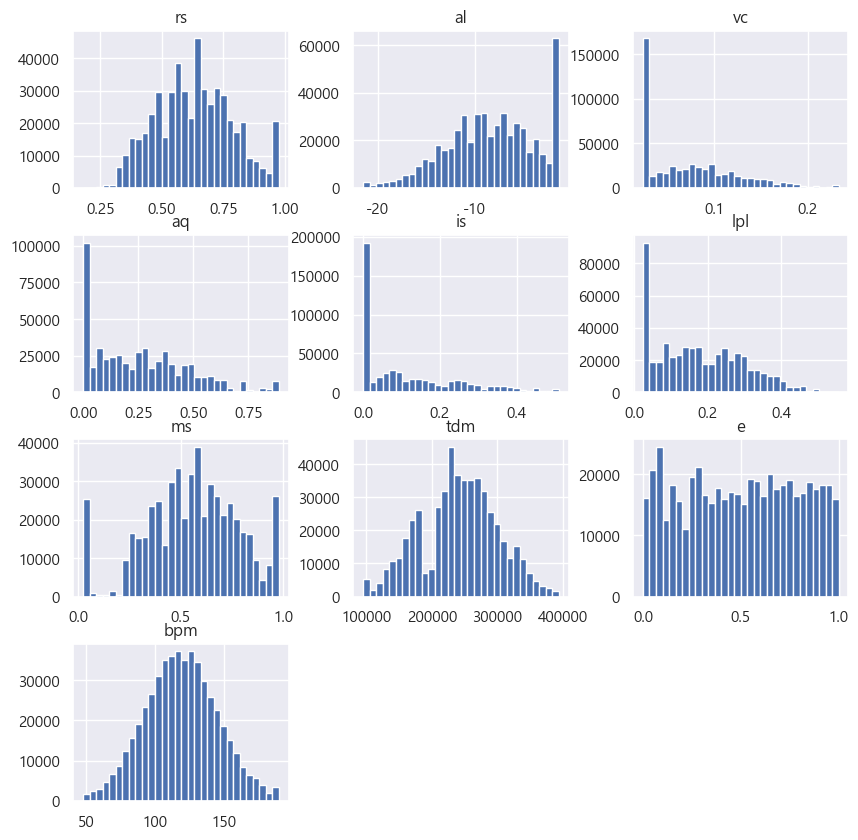

In [262]:
dfw.hist(figsize=(10, 10), bins=30)
plt.show()

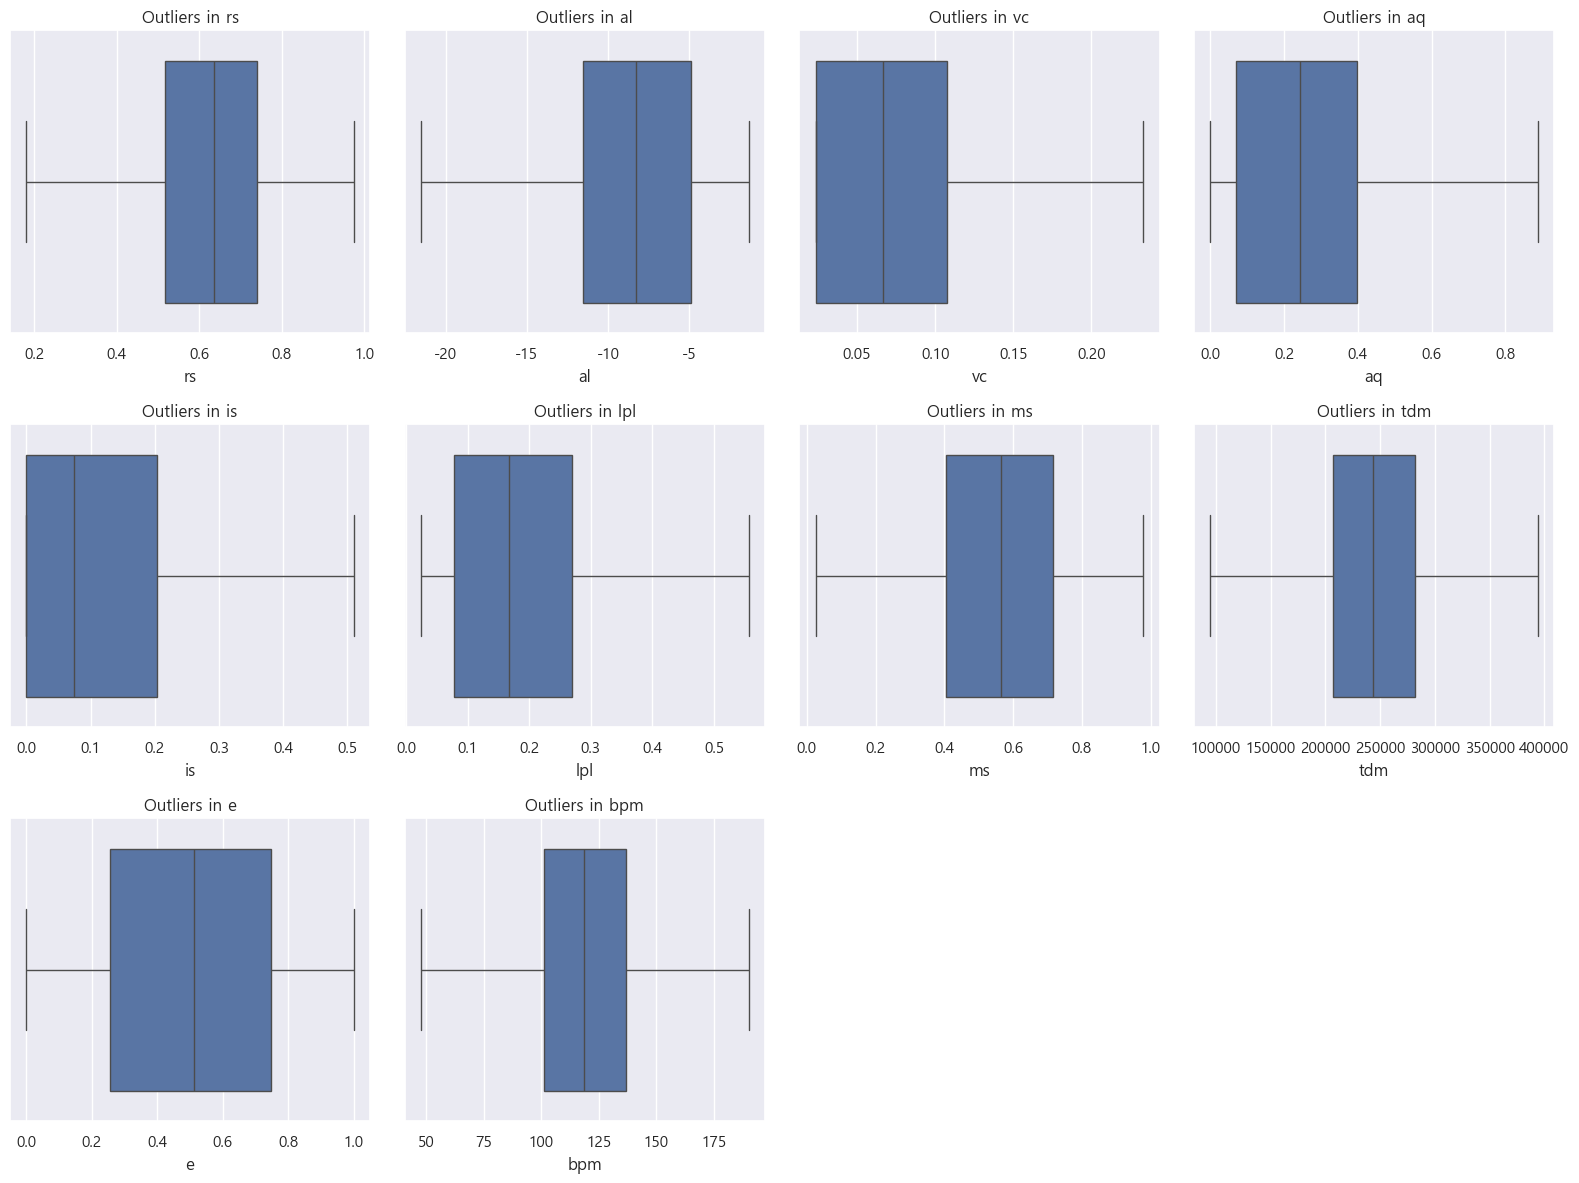

In [263]:
num_features = dfw.select_dtypes(include=np.number).columns.tolist()

# 1. Ï†ÑÏ≤¥ Í∑∏Î¶ºÏùò ÌÅ¨Í∏∞ÏôÄ Í≤©Ïûê(grid) ÏÑ§Ï†ï
n_features = len(num_features)
n_cols = 4  # Ìïú Ï§ÑÏóê Í∑∏Î¶¥ Í∑∏ÎûòÌîÑÏùò Í∞úÏàò (ÏõêÌïòÎäî ÎåÄÎ°ú Ï°∞Ï†à)
n_rows = math.ceil(n_features / n_cols) # ÌïÑÏöîÌïú Ï§ÑÏùò Í∞úÏàò ÏûêÎèô Í≥ÑÏÇ∞

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 4))
axes = axes.flatten() # 2Ï∞®Ïõê Î∞∞Ïó¥ÏùÑ 1Ï∞®ÏõêÏúºÎ°ú Î≥ÄÌôòÌïòÏó¨ Îã§Î£®Í∏∞ ÏâΩÍ≤å Ìï®

# 2. forÎ¨∏ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Í∞Å subplotÏóê boxplot Í∑∏Î¶¨Í∏∞
for i, col in enumerate(num_features):
    sns.boxplot(x=dfw[col], ax=axes[i])
    axes[i].set_title(f"Outliers in {col}")

# 3. ÎÇ®Îäî Îπà subplotÎì§ÏùÄ Î≥¥Ïù¥ÏßÄ ÏïäÍ≤å Ï≤òÎ¶¨
for j in range(n_features, len(axes)):
    axes[j].axis('off')

# 4. Ï†ÑÏ≤¥ Í∑∏Î¶ºÏùÑ Î≥¥Í∏∞ Ï¢ãÍ≤å Ï°∞Ï†ïÌïòÍ≥† Ï∂úÎ†•
plt.tight_layout()
plt.show()

### Ï†êÏàò ÌôïÏù∏

In [264]:
myscore(df = dfw)

MODEL : XGBRegressor
MSE : 700.2772
RMSE : 26.4628
R2 : -0.0079
------------------------------
--- Score Comparison (Current vs Previous) ---
MSE  : 700.2772 vs 703.1462 (Change: -2.8689) üìà
RMSE : 26.4628 vs 26.5169 (Change: -0.0542) üìà
R2   : -0.0079 vs -0.0068 (Change: -0.0010) üìâ
------------------------------



## ÌååÏÉù ÌîºÏ≥ê Ï∂îÍ∞Ä

In [265]:
dfw['tdn'] = dfw['tdm'] / 60000
dfw['ear'] = dfw['e'] / (dfw['aq'] + 1e-5)
dfw['vib'] = dfw['vc'] / (dfw['is'] + 1e-5)
dfw['mr'] = dfw['ms'] * dfw['rs']
dfw['pi'] = dfw['lpl'] * dfw['al']
dfw['re'] = dfw['rs'] * dfw['e']
dfw['ma'] = dfw['ms'] * dfw['aq']

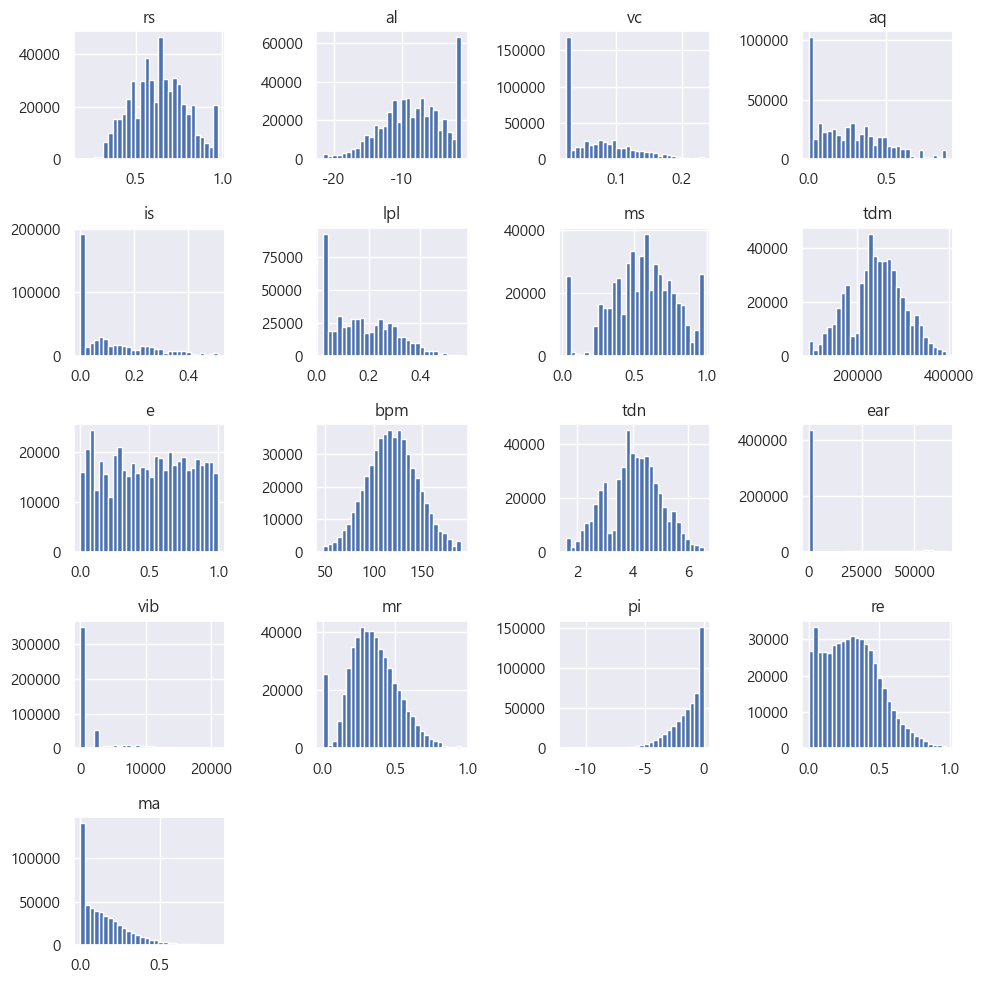

In [266]:
dfw.hist(figsize=(10, 10), bins=30)
plt.tight_layout()
plt.show()

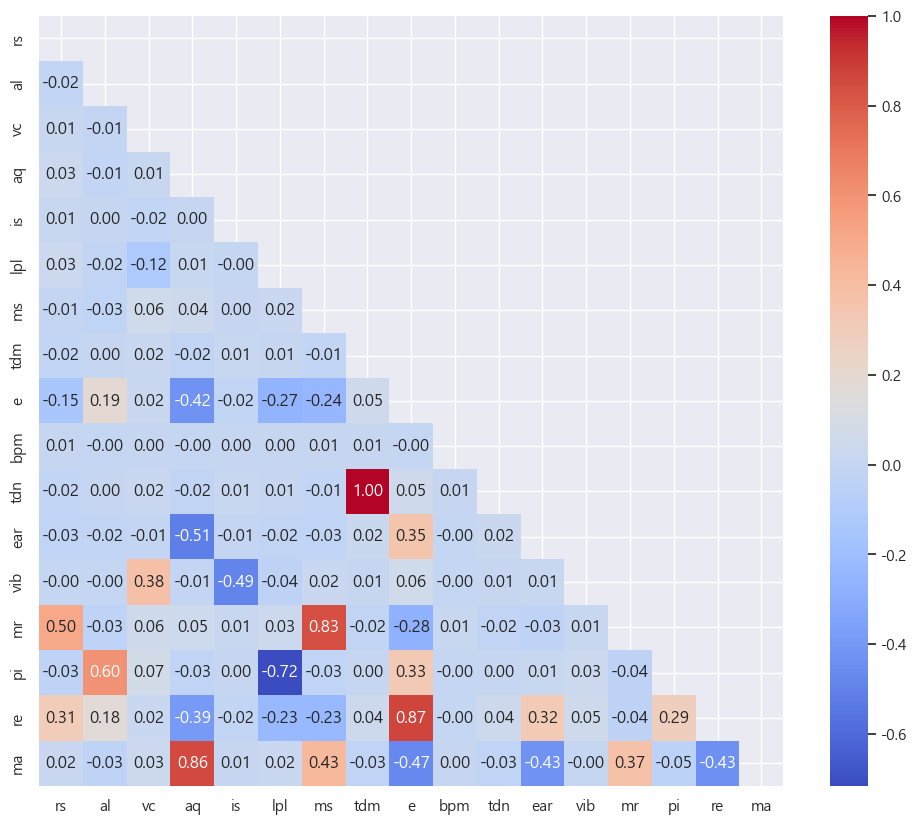

In [267]:
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(dfw.corr(), dtype=bool))
sns.heatmap(dfw.corr(), annot=True, cmap='coolwarm', fmt=".2f", mask=mask)
plt.show()

### Ï†êÏàò ÌôïÏù∏

MODEL : XGBRegressor
MSE : 700.0797
RMSE : 26.4590
R2 : -0.0076
------------------------------
--- Score Comparison (Current vs Previous) ---
MSE  : 700.0797 vs 700.2772 (Change: -0.1975) üìà
RMSE : 26.4590 vs 26.4628 (Change: -0.0037) üìà
R2   : -0.0076 vs -0.0079 (Change: +0.0003) üìà
------------------------------



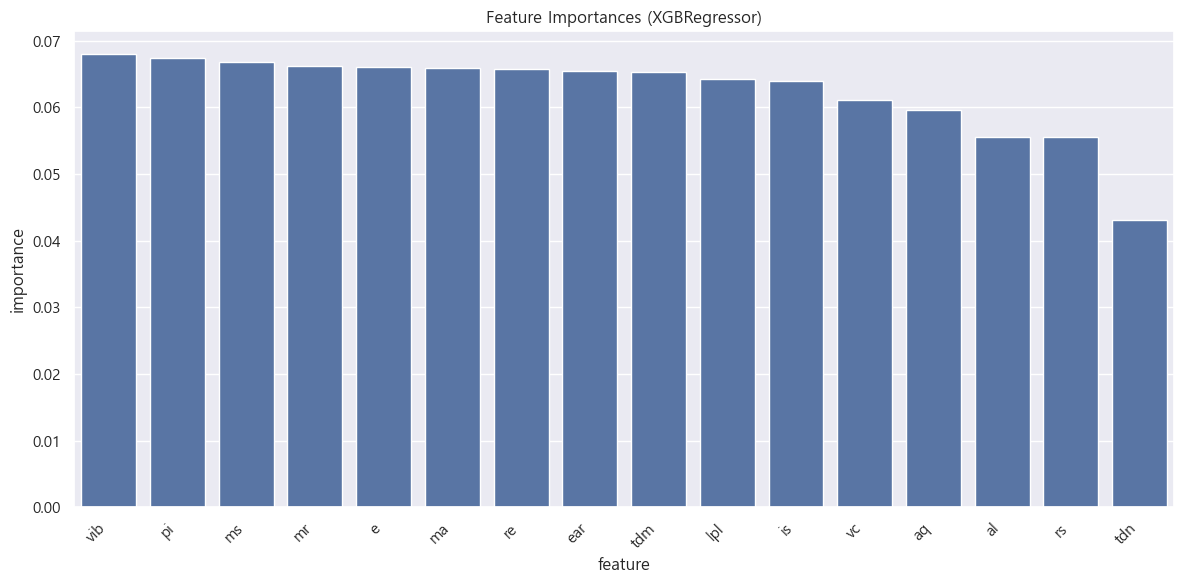

In [268]:
myscore(df = dfw, fi=True)

# Ïä§ÏºÄÏùº (& Ï†êÏàò ÌôïÏù∏)

In [269]:
model_list = [XGBRegressor(),
              LGBMRegressor(verbosity=-1)]

scaler_list = [MinMaxScaler(), RobustScaler(), StandardScaler()]

y = dfw['bpm']
X = dfw.drop('bpm', axis=1)
X80, X20, y80, y20 = train_test_split(X, y, test_size=0.2, random_state=8989)

for sc in scaler_list:

    # ÏõêÏπôÏÉÅ chas(0 or 1)Îäî Ïä§ÏºÄÏùºÎßÅ Ïïà Ìï®
    Xsc = sc.fit(X80)
    X80_scaler = Xsc.transform(X80)
    X20_scaler = Xsc.transform(X20)

    # Î∂ÑÎ•òÏóêÏÑú ÌÉÄÍ≤ü y(0, 1, ...)Îäî Ïä§ÏºÄÏùºÎßÅ Ïïà Ìï®
    # Í∑∏Îü¨ÎÇò, ÌöåÍ∑ÄÏóêÏÑúÎäî ÌÉÄÍ≤ü y(Ïó∞ÏÜçÌòï ÏàòÏπò)ÎèÑ Ïä§ÏºÄÏùºÎßÅ Ìï¥Ïïº Ìï®
    ysc = sc.__class__()
    y80_scaler = ysc.fit_transform(y80.values.reshape(-1, 1))
    y20_scaler = ysc.fit_transform(y20.values.reshape(-1, 1))

    print(sc.__class__.__name__, '\n')
    for model in model_list:
        model.fit(X80_scaler, y80_scaler)
        pred_scaler = model.predict(X20_scaler)

        # ÌÉÄÍ≤ü yÏôÄ ÏòàÏ∏°Í∞í predÎäî Ïä§ÏºÄÏùºÎßÅÎêú Í∞íÏùÑ Ï£ºÍ∏∞ ÎïåÎ¨∏Ïóê Ï†êÏàòÎÇ¥Í∏∞ Ï†ÑÏóê ÏõêÎ≥µÏãúÏºúÏïº Ìï®
        y20_inv = ysc.inverse_transform(y20_scaler.reshape(-1, 1))
        pred_inv = ysc.inverse_transform(pred_scaler.reshape(-1, 1))
        
        mse = mean_squared_error(y20_inv, pred_inv)
        rmse = root_mean_squared_error(y20_inv, pred_inv)
        r2 = r2_score(y20_inv, pred_inv)
        print(f'MSE : {mse:.4f} RMSE : {rmse:.4f} R2 : {r2:.4f} MODEL : {model.__class__.__name__}')  
    print('--'*40, '\n')

MinMaxScaler 

MSE : 699.8316 RMSE : 26.4543 R2 : -0.0072 MODEL : XGBRegressor
MSE : 694.4922 RMSE : 26.3532 R2 : 0.0005 MODEL : LGBMRegressor
-------------------------------------------------------------------------------- 

RobustScaler 

MSE : 700.0150 RMSE : 26.4578 R2 : -0.0075 MODEL : XGBRegressor
MSE : 694.6325 RMSE : 26.3559 R2 : 0.0003 MODEL : LGBMRegressor
-------------------------------------------------------------------------------- 

StandardScaler 

MSE : 699.9008 RMSE : 26.4556 R2 : -0.0073 MODEL : XGBRegressor
MSE : 694.6939 RMSE : 26.3570 R2 : 0.0002 MODEL : LGBMRegressor
-------------------------------------------------------------------------------- 



# Ï§ëÍ∞Ñ Ï†úÏ∂ú

In [277]:
# ==============================================================================
# 1. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ (ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î°úÎìú)
# ==============================================================================
# ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ Î°úÎìú
train_df = pd.read_csv('../data/train.csv')

# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î°úÎìú Î∞è Ï†úÏ∂úÏö© ID Ï†ÄÏû•
test_df = pd.read_csv('../data/test.csv')
test_ids = test_df['id']


# ==============================================================================
# 2. Ï†ÑÏ≤òÎ¶¨ (ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê ÎèôÏùºÌïòÍ≤å Ï†ÅÏö©)
# ==============================================================================

# --- 2-1. ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ ---
# id Ï†úÍ±∞ Î∞è Ïª¨ÎüºÎ™Ö Î≥ÄÍ≤Ω
train_df = train_df.drop('id', axis=1)
train_df.columns = ['rs', 'al', 'vc', 'aq', 'is', 'lpl', 'ms', 'tdm', 'e', 'bpm']

# Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨ (Winsorization)
numeric_features = train_df.select_dtypes(include=np.number).columns.tolist()
for col in numeric_features:
    Q1 = train_df[col].quantile(0.25)
    Q3 = train_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    train_df[col] = np.where(train_df[col] < lower_bound, lower_bound,
                           np.where(train_df[col] > upper_bound, upper_bound, train_df[col]))

# ÌååÏÉù ÌîºÏ≥ê Ï∂îÍ∞Ä
train_df['tdn'] = train_df['tdm'] / 60000
train_df['ear'] = train_df['e'] / (train_df['aq'] + 1e-5)
train_df['vib'] = train_df['vc'] / (train_df['is'] + 1e-5)
train_df['mr'] = train_df['ms'] * train_df['rs']
train_df['pi'] = train_df['lpl'] * train_df['al']
train_df['re'] = train_df['rs'] * train_df['e']
train_df['ma'] = train_df['ms'] * train_df['aq']


# --- 2-2. ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏóêÎèÑ ÎèôÏùºÌïú Ï†ÑÏ≤òÎ¶¨ Í≥ºÏ†ïÏùÑ Ï†ÅÏö©Ìï©ÎãàÎã§. ---
# id Ï†úÍ±∞ Î∞è Ïª¨ÎüºÎ™Ö Î≥ÄÍ≤Ω
test_df = test_df.drop('id', axis=1)
test_df.columns = ['rs', 'al', 'vc', 'aq', 'is', 'lpl', 'ms', 'tdm', 'e'] # bpm Ïª¨Îüº ÏóÜÏùå

# Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨ (Winsorization)
# Ï§ëÏöî: ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò quantileÏù¥ ÏïÑÎãå, ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Ïùò quantileÏùÑ ÏÇ¨Ïö©Ìï¥Ïïº ÌïòÎÇò,
# Ïó¨Í∏∞ÏÑúÎäî Ìé∏ÏùòÏÉÅ Í∞Å Îç∞Ïù¥ÌÑ∞ÏÖã Í∏∞Ï§ÄÏúºÎ°ú Ï≤òÎ¶¨Ìï©ÎãàÎã§.
numeric_features_test = test_df.select_dtypes(include=np.number).columns.tolist()
for col in numeric_features_test:
    Q1 = test_df[col].quantile(0.25)
    Q3 = test_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    test_df[col] = np.where(test_df[col] < lower_bound, lower_bound,
                           np.where(test_df[col] > upper_bound, upper_bound, test_df[col]))

# ÌååÏÉù ÌîºÏ≥ê Ï∂îÍ∞Ä
test_df['tdn'] = test_df['tdm'] / 60000
test_df['ear'] = test_df['e'] / (test_df['aq'] + 1e-5)
test_df['vib'] = test_df['vc'] / (test_df['is'] + 1e-5)
test_df['mr'] = test_df['ms'] * test_df['rs']
test_df['pi'] = test_df['lpl'] * test_df['al']
test_df['re'] = test_df['rs'] * test_df['e']
test_df['ma'] = test_df['ms'] * test_df['aq']


# ==============================================================================
# 3. Î™®Îç∏ ÌïôÏäµ (Ï†ÑÏ≤¥ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïö©)
# ==============================================================================
# XÏôÄ y Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
y_train = train_df['bpm']
X_train = train_df.drop('bpm', axis=1)
X_test = test_df.copy()

# ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò Ïª¨Îüº ÏàúÏÑúÎ•º ÎèôÏùºÌïòÍ≤å ÎßûÏ∂§
X_test = X_test[X_train.columns]

# ÏµúÏ¢Ö Î™®Îç∏ Ï†ïÏùò
final_model = TransformedTargetRegressor(
    regressor=Pipeline([
        ('my_scaler', MinMaxScaler()),
        ('my_model', LGBMRegressor(verbosity=-1, random_state=8989))
    ]),
    transformer=MinMaxScaler() # yÍ∞íÏóê Ï†ÅÏö©Ìï† Ïä§ÏºÄÏùºÎü¨
)

# Ï†ÑÏ≤¥ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Î°ú Î™®Îç∏ ÌõàÎ†®
final_model.fit(X_train, y_train)
print("ÏµúÏ¢Ö Î™®Îç∏ ÌïôÏäµÏù¥ ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§.")


# ==============================================================================
# 4. ÏòàÏ∏° (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïö©)
# ==============================================================================
# ÏµúÏ¢Ö ÏòàÏ∏° ÏàòÌñâ (Í≤∞Í≥ºÎäî ÏûêÎèôÏúºÎ°ú Ïó≠Î≥ÄÌôòÎê®)
predictions = final_model.predict(X_test)
print("ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏòàÏ∏°Ïù¥ ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§.")


# ==============================================================================
# 5. Ï†úÏ∂ú ÌååÏùº ÏÉùÏÑ±
# ==============================================================================
submission = pd.DataFrame({
    "id": test_ids,
    "bpm": predictions
})

submission.to_csv("submission.csv", index=False)
print("submission.csv ÌååÏùº ÏÉùÏÑ±Ïù¥ ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§.")
print(submission.head())

ÏµúÏ¢Ö Î™®Îç∏ ÌïôÏäµÏù¥ ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§.
ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏòàÏ∏°Ïù¥ ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§.
submission.csv ÌååÏùº ÏÉùÏÑ±Ïù¥ ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§.
       id         bpm
0  524164  119.823408
1  524165  119.154888
2  524166  121.159489
3  524167  119.279225
4  524168  119.822438


# ÌååÏù¥ÌîÑÎùºÏù∏ (Î°úÍ∑∏ + Ïä§ÏºÄÏùº)

In [ ]:
y = dfw['bpm']
X = dfw.drop('bpm', axis=1)
X80, X20, y80, y20 = train_test_split(X, y, test_size=0.2, random_state=8989)

tran_pipe = TransformedTargetRegressor (
                Pipeline([ ('my_log1p', FunctionTransformer(np.log1p, validate=True)), 
                           ('my_scaler', StandardScaler()),
                           ('my_model', XGBRegressor())
                       ]),
                func=np.log1p, 
                inverse_func=np.expm1
)

## Ï†êÏàò ÌôïÏù∏

In [ ]:
myscore(df=dfw, model=tran_pipe)

# ÌäπÏ†ï ÌîºÏ≥êÎßå ÌååÏù¥ÌîÑÎùºÏù∏

In [ ]:
y = dfw['bpm']
X = dfw.drop('bpm', axis=1)
X80, X20, y80, y20 = train_test_split(X, y, test_size=0.2, random_state=8989)

# Î°úÍ∑∏ Î≥ÄÌôò ÎåÄÏÉÅ
log_features = ['vc', 'aq', 'is']

# 1Ô∏è‚É£ ÌîºÏ≤ò Î≥ÄÌôò ÌååÏù¥ÌîÑÎùºÏù∏
feature_pipe = ColumnTransformer([
    ('log_transform', FunctionTransformer(np.log1p, validate=True), log_features),
    ('pass', 'passthrough', [col for col in X80.columns if col not in log_features])
])

# 2Ô∏è‚É£ Ï†ÑÏ≤¥ Î™®Îç∏ ÌååÏù¥ÌîÑÎùºÏù∏
model = Pipeline([
    ('feature_pipe', feature_pipe),
    ('scaler', StandardScaler()),
    ('xgb', XGBRegressor())
])

# 3Ô∏è‚É£ ÌÉÄÍπÉ Î°úÍ∑∏Î≥ÄÌôò + Ïó≠Î≥ÄÌôò ÏûêÎèô Ï†ÅÏö©
tran_pipe2 = TransformedTargetRegressor(
    regressor=model,
    func=np.log1p,
    inverse_func=np.expm1
)

## Ï†êÏàò ÌôïÏù∏

In [ ]:
myscore(df=dfw, model=tran_pipe2)

# Ïä§ÌÉúÌÇπ

In [ ]:
# # ====================================
# # 2Ô∏è‚É£ Base models (XGB + LGBM)
# # ====================================
# xgb = XGBRegressor(
#     n_estimators=500,
#     learning_rate=0.05,
#     max_depth=6,
#     subsample=0.8,
#     colsample_bytree=0.8,
#     random_state=42,
#     n_jobs=-1,
#     tree_method='gpu_hist',  # ‚úÖ GPU ÌïôÏäµ
#     predictor='gpu_predictor'
# )

# lgbm = LGBMRegressor(
#     n_estimators=500,
#     learning_rate=0.05,
#     num_leaves=31,
#     subsample=0.8,
#     colsample_bytree=0.8,
#     random_state=42,
#     n_jobs=-1,
#     device='gpu'
# )

# # ====================================
# # 3Ô∏è‚É£ Meta model (stacking layer)
# # ====================================
# # Î≥¥ÌÜµ Í∞ÑÎã®Ìïú RidgeÎÇò LinearRegression ÏÇ¨Ïö©
# meta_model = RidgeCV(alphas=np.logspace(-3, 3, 7))
# #ÌõÑÎ≥¥ alpha: [0.001, 0.01, 0.1, 1, 10, 100, 1000]
# # ====================================
# # 4Ô∏è‚É£ Stacking Regressor
# # ====================================
# stack_model = StackingRegressor(
#     estimators=[
#         ("xgb", xgb),
#         ("lgbm", lgbm)
#     ],
#     final_estimator=meta_model,
#     passthrough=False,  # base Î™®Îç∏ ÏûÖÎ†•ÏùÑ meta modelÏóê Ï∂îÍ∞ÄÌï†ÏßÄ Ïó¨Î∂Ä
#     n_jobs=-1
# )

# # ====================================
# # 6Ô∏è‚É£ ÌïôÏäµ Î∞è ÌèâÍ∞Ä
# # ====================================
# stack_model.fit(X80, y80)
# pred = stack_model.predict(X20)

# mse = mean_squared_error(y20, pred)
# print("Stacking MSE:", mse)

## Ï†êÏàò ÌôïÏù∏

In [ ]:
# myscore(df=dfw)